In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.autograd import Variable
import warnings
warnings.filterwarnings('ignore')
np.random.seed(0)

# Data Loading & Preprocessing:

    1. Loading the dataset and Transform into Tensors:

In [2]:
from torchvision import datasets, transforms
dataset_path=datasets.ImageFolder(root='fruits360/Training/', transform=transforms.Compose([transforms.ToTensor()]))

    2. Spliting the dataset Into Train and Test:
    
        Spliting the Dataset into 80% training and 20% testing dataset, and shuffling the dataset to distribute the train 
        and test into random examples 
        

In [3]:
from torch.utils.data.sampler import SubsetRandomSampler

split = int(0.8 * len(dataset_path))
index_list = list(range(len(dataset_path)))
np.random.shuffle(index_list)
train_idx, test_idx = index_list[:split], index_list[split:] ## Traing and testing indexes.


## create sampler objects using SubsetRandomSampler
tr_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)
## create iterator objects for train and test datasets
train_loader = torch.utils.data.DataLoader(dataset_path, batch_size=256, sampler=tr_sampler)
test_loader = torch.utils.data.DataLoader(dataset_path, batch_size=256, sampler=test_sampler)

print ("Total Number of Examples: ",len(dataset_path))
print ("Number of training Examples: ",len(tr_sampler))
print ("Number of testing Examples: ",len(test_sampler))

Total Number of Examples:  8147
Number of training Examples:  6517
Number of testing Examples:  1630


In [4]:
Classes_num=len(train_loader.dataset.classes)
print ('Number of Classes',Classes_num)
print('Classes Name: ', train_loader.dataset.classes)

Number of Classes 15
Classes Name:  ['Rambutan', 'Raspberry', 'Redcurrant', 'Salak', 'Strawberry', 'Strawberry Wedge', 'Tamarillo', 'Tangelo', 'Tomato 1', 'Tomato 2', 'Tomato 3', 'Tomato 4', 'Tomato Cherry Red', 'Tomato Maroon', 'Walnut']


Example: 


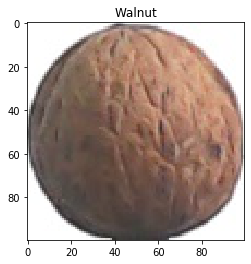

In [17]:
print ('Example: ')
i1, l1 = next(iter(train_loader))
plt.title(train_loader.dataset.classes[l1[0]])
plt.imshow(np.array(i1[0].permute(1, 2, 0)));

# Neural Network Model

The neural network architectures in PyTorch can be defined in a class which inherits the properties from the base class from nn package called Module. This inheritance from the nn.Module class allows us to implement, access, and call a number of methods easily. We can define all the layers inside the constructor of the class, and the forward propagation steps inside the forward function.

Our Input image has [100,100,3] dimensions, so we flatten our input to 100*100*3=30000 array and forward it neural network. 
We will define a network with the following layer configurations: [30000, 200,200,Number of classes]. This configuration represents the 30000 nodes (100*100*3 pixels) in the input layer, 200 in the first hidden layer,200 in the second hidden layer, and 15 in the output layer as 15 number of classes. Inside the forward function, we will use the relu activation function in the hidden layer (which can be accessed from the nn module).

![DNN Model](DNN.png)

In [6]:
from torch import nn
import torch.nn.functional as F

class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(100 * 100*3, 200)
        self.fc2 = nn.Linear(200, 200) ## 2 hidden layers with 200 neurons each
        self.fc3 = nn.Linear(200, Classes_num)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x)

model = Model()
print(model)

Model(
  (fc1): Linear(in_features=30000, out_features=200, bias=True)
  (fc2): Linear(in_features=200, out_features=200, bias=True)
  (fc3): Linear(in_features=200, out_features=15, bias=True)
)


Define the loss function and the optimizer using the nn and optim package:

In [7]:
from torch import optim
# create a stochastic gradient descent optimizer
optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay= 1e-6, momentum=0.9,nesterov = True)
# create a loss function
criterion = nn.NLLLoss()

# Model Training

We are now ready to train the model. The core steps are Forward Propagation, Loss Computation, Backpropagation, and updating the parameters.


In [8]:
# run the main training loop
loss_array=[]
epochs=50
for epoch in range(1,epochs):
    
    for batch_idx, (data, target) in enumerate(train_loader):
        
        data, target = Variable(data), Variable(target)
        
        # resize data from (batch_size, 100, 100, 3) to (batch_size, 100*100*3)
        data = data.view(-1, 100*100*3)
        #In PyTorch, we need to set the gradients to zero before starting to do backpropragation because PyTorch
        optimizer.zero_grad()## accumulates the gradients on subsequent backward passes.
        
        ## 1. forward propagation
        model_out = model(data)
        
        ## 2. loss calculation
        loss = criterion(model_out, target)
        
        ## 3. backward propagation
        loss.backward()
        
        ## 4. weight optimization
        optimizer.step()
        
        loss_array.append(loss.item())
        if batch_idx % len(train_loader)-1 == 0:
            
            print('Epoch: ',epoch,'Loss: ', loss.item())

Epoch:  1 Loss:  2.676236152648926
Epoch:  2 Loss:  1.223630666732788
Epoch:  3 Loss:  0.2828058898448944
Epoch:  4 Loss:  0.3866397738456726
Epoch:  5 Loss:  0.060657549649477005
Epoch:  6 Loss:  0.03798244148492813
Epoch:  7 Loss:  0.03264380618929863
Epoch:  8 Loss:  0.01853816583752632
Epoch:  9 Loss:  0.012227613478899002
Epoch:  10 Loss:  0.00943782925605774
Epoch:  11 Loss:  0.009823542088270187
Epoch:  12 Loss:  0.006723150610923767
Epoch:  13 Loss:  0.004736457020044327
Epoch:  14 Loss:  0.005265101790428162
Epoch:  15 Loss:  0.004636250436306
Epoch:  16 Loss:  0.0035162046551704407
Epoch:  17 Loss:  0.003940369933843613
Epoch:  18 Loss:  0.0031558461487293243
Epoch:  19 Loss:  0.003167133778333664
Epoch:  20 Loss:  0.002497456967830658
Epoch:  21 Loss:  0.002007409930229187
Epoch:  22 Loss:  0.0018031634390354156
Epoch:  23 Loss:  0.00200788676738739
Epoch:  24 Loss:  0.0020479224622249603
Epoch:  25 Loss:  0.0022094734013080597
Epoch:  26 Loss:  0.0015702582895755768
Epoch: 

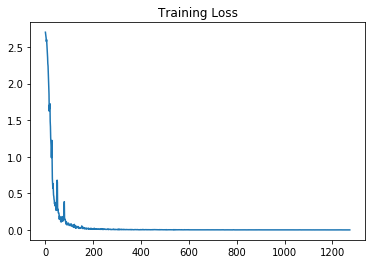

In [9]:
%matplotlib inline
plt.plot(loss_array)
plt.title("Training Loss")
plt.show()

# Model Testing

Once the model is trained, Lets test it on test dataset.

    1. Testing on some example

In [10]:
## dataloader for test dataset 
dataiter = iter(test_loader)
data, labels = dataiter.next()
data, target = Variable(data), Variable(target)
data_ = data.view(-1, 100*100*3)

output = model(data_)
_, preds_tensor = torch.max(output, 1)
preds = np.squeeze(preds_tensor.numpy())
print ("Actual:   ", np.array(labels[:10]))
print ("Predicted:", preds[:10])

Actual:    [ 7  0 12 14 14 10  1  6 10  0]
Predicted: [ 7  0 12 14 14 10  1  6 10  0]


    2. Checking Accuracy of Model

In [11]:
# run a test loop
test_loss = 0
correct = 0
for data, target in test_loader:
    data, target = Variable(data), Variable(target)
    data = data.view(-1, 100*100*3)
    model_out = model(data)
    # sum up batch loss
    
    test_loss += criterion(model_out, target).item()
    pred = model_out.data.max(1)[1]  # get the index of the max log-probability
    correct += pred.eq(target.data).sum()

test_loss /= len(test_loader.dataset)

print('Average loss: ',test_loss)
print('Accuracy: ',np.array(100. * correct / len(test_sampler)),'%')
print ('Total Test Examples: ',len(test_sampler))
print ('Correct predicted Examples: ',int(correct))


Average loss:  7.021029207618146e-07
Accuracy:  100 %
Total Test Examples:  1630
Correct predicted Examples:  1630
